In [ ]:
!pip install tensorflow --upgrade --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 40.6 MB/s eta 0:00:00
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.0/804.0 kB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 59.0 

In [4]:
!pip install tensorflow-addons==0.16.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.1 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade keras

In [2]:
!pip install -U -q segmentation-models


import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
from tensorflow.keras import models
import segmentation_models as sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.0 MB/s eta 0:00:00
Segmentation Models: using `tf.keras` framework.


In [5]:
import numpy as np
import pandas as pd
import os
from tensorflow import keras
from tensorflow.keras import models
import tensorflow_addons as tfa
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
from tensorflow.python.keras.utils import generic_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
train_dir = '/content/drive/MyDrive/dataset/Apple/train'
val_dir = '/content/drive/MyDrive/dataset/Apple/val'
test_dir = '/content/drive/MyDrive/dataset/Apple/test'

In [12]:
img_width, img_height = 256, 256
batch_size = 64

In [13]:
data_generator = ImageDataGenerator(rescale=1./255)

In [14]:
train_dataset = data_generator.flow_from_directory(
    directory=train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 7050 images belonging to 4 classes.


In [15]:
test_dataset = data_generator.flow_from_directory(
    directory=test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1943 images belonging to 4 classes.


In [16]:
val_dataset = data_generator.flow_from_directory(
    directory=val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 721 images belonging to 4 classes.


In [18]:
import tensorflow as tf

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')  # 4 output classes
])

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

In [ ]:
num_epochs = 10
history=model.fit(train_dataset, epochs=num_epochs, validation_data=val_dataset)

Epoch 1/10
111/111 [==============================] - 3713s 33s/step - loss: 0.7498 - accuracy: 0.7250 - precision: 0.8234 - recall: 0.6397 - auc: 0.9197 - val_loss: 0.4168 - val_accuracy: 0.8363 - val_precision: 0.8441 - val_recall: 0.8183 - val_auc: 0.9684
Epoch 2/10
 85/111 [=====================>........] - ETA: 4:35 - loss: 0.2197 - accuracy: 0.9233 - precision: 0.9311 - recall: 0.9171 - auc: 0.9902

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.save("cnn.h5")

In [ ]:
model.summary()

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model_mn = tf.keras.applications.MobileNetV2()
print(model_mn)

14536120/14536120 [==============================] - 1s 0us/step


In [ ]:
model_mn.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

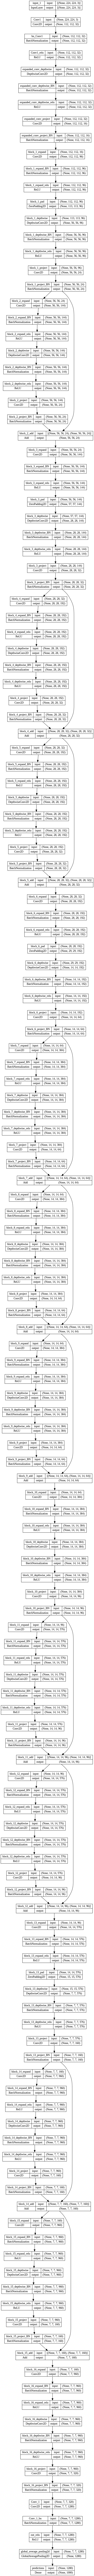

In [ ]:
tf.keras.utils.plot_model(model_mn, show_shapes=True, show_layer_names=True)

In [ ]:
imgs, labels =next(train_dataset)

In [ ]:
#This function will plot images in the form of a grid with 1 row and 10 columns
def plotImages(images_arr):
    fig,axes = plt.subplots(1,10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

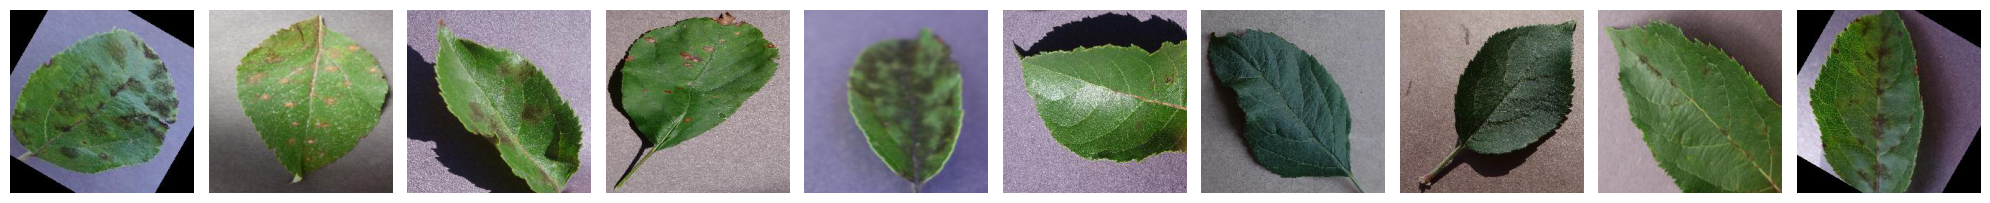

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3}


In [ ]:
plotImages(imgs)
print(labels[0:9])
print(train_dataset.class_indices)

In [ ]:
seed = 40
tf.random.set_seed(seed)
mobile_MNV2 = tf.keras.applications.MobileNet(input_shape=(256,256,3),
                                                   include_top=False,
                                                   weights="imagenet")
mobile_MNV2.summary()

17225924/17225924 [==============================] - 1s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 128, 128, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 128, 128, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 128, 128, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 128, 128, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 128, 128, 32

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
pd.set_option("max_colwidth", -1)
info = [(layer, layer.name, layer.trainable) for layer in mobile_MNV2.layers]
analysis = pd.DataFrame(info, columns = ["Layer Type", "Layer Name", "Train Status"])
analysis

,Layer Type,Layer Name,Train Status
0,<keras.engine.input_layer.InputLayer object at 0x7f3884e97b80>,input_2,True
1,<keras.layers.convolutional.conv2d.Conv2D object at 0x7f3884e97940>,conv1,True
2,<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f3884f0a2c0>,conv1_bn,True
3,<keras.layers.activation.relu.ReLU object at 0x7f3884cdcdc0>,conv1_relu,True
4,<keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x7f3884cdd810>,conv_dw_1,True
...,...,...,...
81,<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f3884bbd510>,conv_dw_13_bn,True
82,<keras.layers.activation.relu.ReLU object at 0x7f3884d9c340>,conv_dw_13_relu,True
83,<keras.layers.convolutional.conv2d.Conv2D object at 0x7f3884d9cac0>,conv_pw_13,True
84,<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f3884bd0730>,conv_pw_13_bn,True


In [ ]:
model_MNV2 = tf.keras.Sequential()
model_MNV2.add(mobile_MNV2)
model_MNV2.add(GlobalAveragePooling2D(),)
model_MNV2.add(Dense(4,
         kernel_initializer=tf.keras.initializers.RandomUniform(seed=seed),
         bias_initializer=tf.keras.initializers.Zeros(), name='dense', activation='softmax'))

model_MNV2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 8, 8, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense (Dense)               (None, 4)                 4100      
                                                                 
Total params: 3,232,964
Trainable params: 3,211,076
Non-trainable params: 21,888
_________________________________________________________________


In [ ]:
pd.set_option("max_colwidth", -1)
info = [(layer, layer.name, layer.trainable) for layer in model_MNV2.layers]
analysis = pd.DataFrame(info, columns = ["Layer Type", "Layer Name", "Train Status"])
analysis

,Layer Type,Layer Name,Train Status
0,<keras.engine.functional.Functional object at 0x7f3884d20070>,mobilenet_1.00_224,True
1,<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7f3884e97730>,global_average_pooling2d_1,True
2,<keras.layers.core.dense.Dense object at 0x7f3884caadd0>,dense,True


In [ ]:
f1 = tfa.metrics.F1Score(num_classes=4, average='macro')

#Callbacks
rlp = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                           mode='min',
                                           patience=2,
                                           verbose=0,
                                           factor=0.5)
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                             patience=10,
                                             verbose=1,
                                             restore_best_weights=True)
callbacks=[rlp,earlystop]

In [ ]:
from keras import metrics

In [ ]:
model_MNV2.compile(loss='categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics=[f1,metrics.mean_squared_error,
                       metrics.mean_absolute_error,
                       metrics.mean_absolute_percentage_error,
                       metrics.categorical_accuracy,
                       metrics.accuracy])

In [ ]:
history_MNV2 = model_MNV2.fit(train_dataset,
                    steps_per_epoch=train_dataset.samples//batch_size,
                    validation_data=val_dataset,
                    validation_steps = val_dataset.samples//(batch_size),
                    verbose = 1,
                    epochs=5,
                    callbacks=callbacks)

Epoch 1/5
220/220 [==============================] - 2319s 10s/step - loss: 0.0889 - f1_score: 0.9693 - mean_squared_error: 0.0116 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 9822884.0000 - categorical_accuracy: 0.9691 - accuracy: 3.5623e-05 - val_loss: 0.0944 - val_f1_score: 0.9889 - val_mean_squared_error: 0.0052 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 3370000.2500 - val_categorical_accuracy: 0.9886 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/5
220/220 [==============================] - 2278s 10s/step - loss: 0.0310 - f1_score: 0.9910 - mean_squared_error: 0.0038 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 3350522.7500 - categorical_accuracy: 0.9909 - accuracy: 3.5623e-05 - val_loss: 0.0771 - val_f1_score: 0.9758 - val_mean_squared_error: 0.0103 - val_mean_absolute_error: 0.0147 - val_mean_absolute_percentage_error: 7360478.5000 - val_categorical_accuracy: 0.9759 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 

In [ ]:
model_MNV2.save("model_MNV2.h5")

In [ ]:
model_MNV2.save_weights('./checkpoints/MNV2_checkpoint')

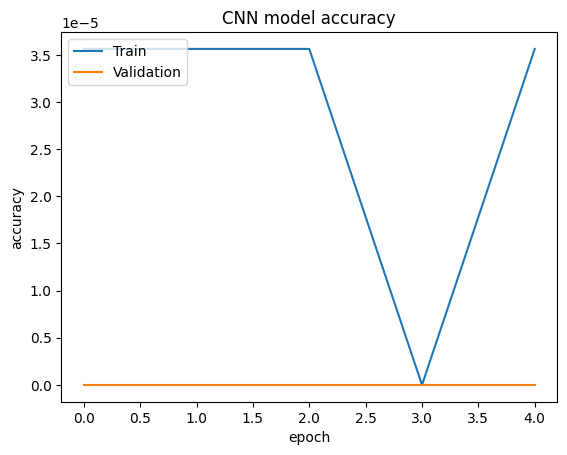

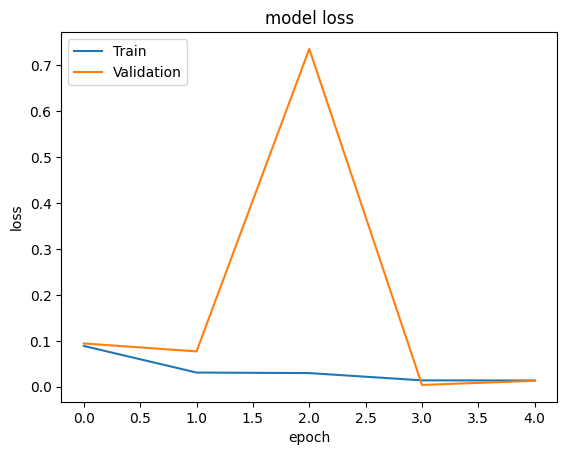

In [ ]:
# summarize history for accuracy
plt.plot(history_MNV2.history['accuracy'])
plt.plot(history_MNV2.history['val_accuracy'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_MNV2.history['loss'])
plt.plot(history_MNV2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# **Convert the model to TFLite**

In [ ]:
# Install nightly package for some functionalities that aren't in alpha
!pip install tf-nightly-gpu-2.0-preview

# Install TF Hub for TF2
!pip install 'tensorflow-hub == 0.4'

ERROR: Could not find a version that satisfies the requirement tf-nightly-gpu-2.0-preview (from versions: none)
ERROR: No matching distribution found for tf-nightly-gpu-2.0-preview
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-hub
    Found existing installation: tensorflow-hub 0.13.0
    Uninstalling tensorflow-hub-0.13.0:
      Successfully uninstalled tensorflow-hub-0.13.0


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)
#tf.enable_eager_execution()

import tensorflow_hub as hub
import os
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
#from keras import optimizers

In [ ]:
!mkdir -p saved_model
model.save('saved_model/model_MNV2')

In [ ]:
!cp -r /content/saved_model /content/drive/MyDrive/dataset/Apple

In [ ]:
# Now confirm that we can reload it, and it still gives the same results
reloaded = tf.keras.experimental.load_from_saved_model(export_path, custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
def predict_reload(image):
    probabilities = reloaded.predict(np.asarray([img]))[0]
    class_idx = np.argmax(probabilities)

    return {classes[class_idx]: probabilities[class_idx]}

In [ ]:
reloaded = '/content/saved_model/model_MNV2/saved_model.pb'

## **Inception Model**

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
model = EfficientNetB0(weights=None)

In [ ]:
dataset_path = '/content/drive/MyDrive/dataset/Apple/train/'

In [ ]:
IMG_Size = (256,256)
batch_size = 32

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/.255, validation_split=0.1)

In [ ]:
ds_train = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_Size),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    subset='training',
)


ds_valid = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_Size),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    subset='validation',
)

ds_test = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_Size),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    subset='validation',
)

Found 6348 images belonging to 4 classes.
Found 702 images belonging to 4 classes.
Found 702 images belonging to 4 classes.


In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1,5)
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

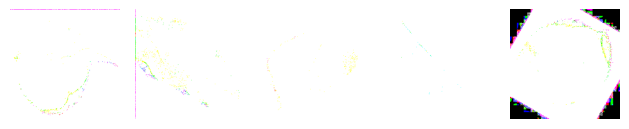

[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


In [ ]:
from matplotlib import pyplot as plt
imgs,labels = ds_train[0]
plotImages(imgs)
print(labels[:5])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

img_augmentation = Sequential(
    [
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

In [ ]:
# One-hot / categorical encoding
def input_preprocess(image, label):
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label


ds_train = ds_train.map(
    input_preprocess, num_parallel_calls=tf.data.AUTOTUNE
)
ds_train = ds_train.batch(batch_size=batch_size, drop_remainder=True)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

ds_test = ds_test.map(input_preprocess)
ds_test = ds_test.batch(batch_size=batch_size, drop_remainder=True)

AttributeError: ignored

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

with strategy.scope():
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = img_augmentation(inputs)
    outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(x)

    model = tf.keras.Model(inputs, outputs)
    model.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
    )

model.summary()

epochs = 5
hist = model.fit(ds_train, epochs=epochs, validation_data=ds_test, verbose=2)